In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text, plot_tree
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preparation:

In [3]:
# Load dataset
df = pd.read_csv('heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


# 2. Exploratory Data Analysis (EDA):

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [8]:
# Check for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

#### Visualize distributions:

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

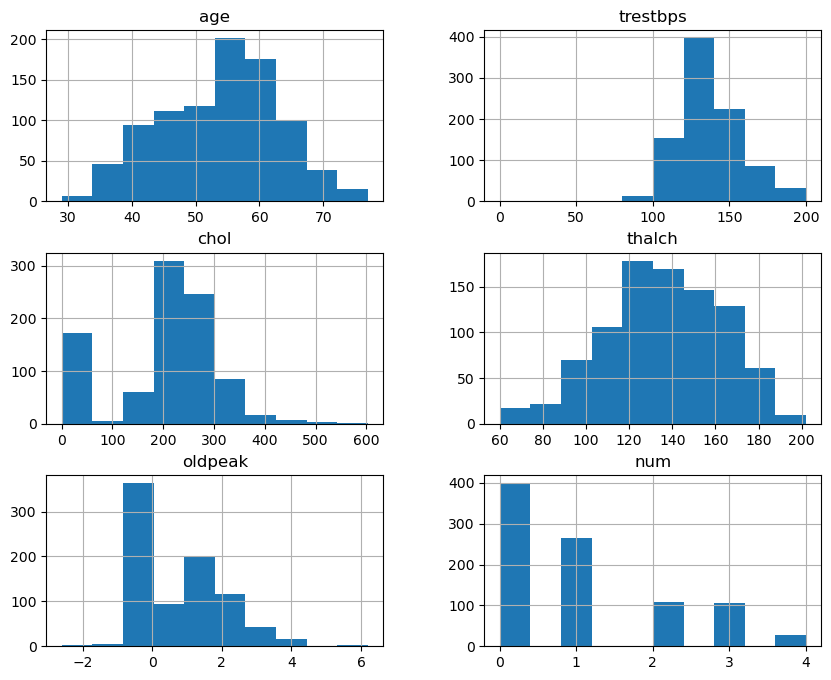

In [10]:
# Histograms
df.hist(figsize=(10, 8))

<Axes: >

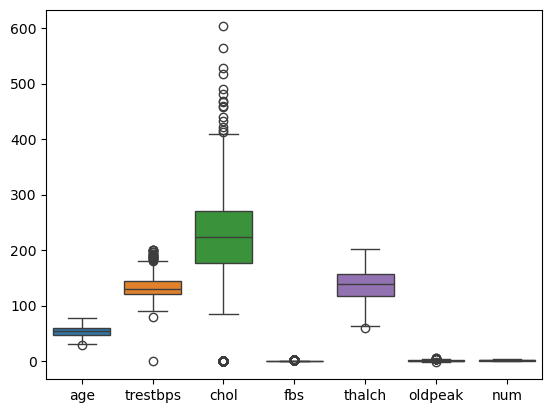

In [11]:
# Box plots
sns.boxplot(data=df)

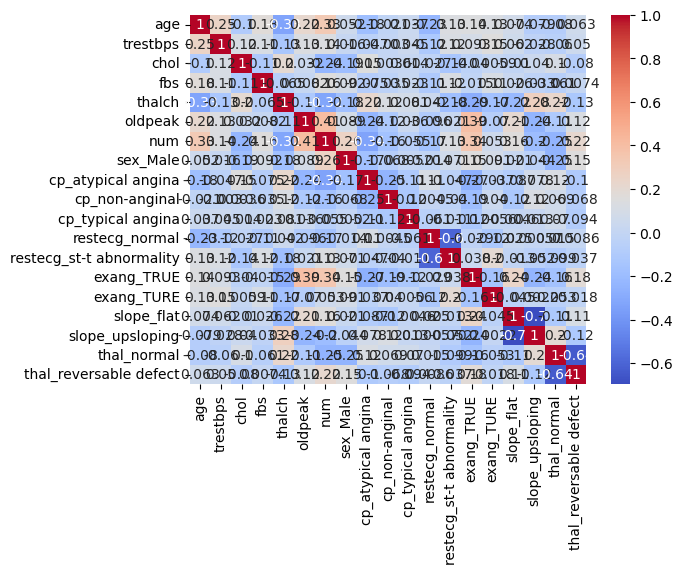

In [67]:
# Correlation matrix:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# 3.Feature Engineering:

In [20]:
# Encode categorical variables:
df = pd.get_dummies(df, drop_first=True)
df

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_TRUE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,True,False,False,True,False,False,False,False,False,False,False,False
1,41,135,203,False,132,0.0,0,True,True,False,False,True,False,False,False,True,False,False,False
2,57,140,192,False,148,0.4,0,True,False,False,False,True,False,False,False,True,False,False,False
3,52,118,186,False,190,0.0,0,True,False,False,True,False,False,False,False,True,False,False,False
4,57,110,201,False,126,1.5,0,True,False,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4,True,False,False,False,True,False,False,False,False,True,False,True
904,62,166,170,False,120,3.0,4,True,False,False,False,False,True,True,False,True,False,True,False
905,56,170,0,False,123,2.5,4,True,False,True,False,False,False,True,False,False,False,False,True
906,56,144,208,True,105,NaN,4,True,False,True,False,False,True,False,True,False,False,False,False


In [22]:
# Scale numerical features (if necessary):
scaler = StandardScaler()
scaler

StandardScaler()

In [24]:
scaled_features = scaler.fit_transform(df)
scaled_features

array([[ 1.00602683,  0.56739446,  0.28129674, ..., -0.69894534,
        -0.82551892, -0.77732894],
       [-1.39756029,  0.07696688,  0.01352615, ..., -0.69894534,
        -0.82551892, -0.77732894],
       [ 0.35050307,  0.32218067, -0.0846564 , ..., -0.69894534,
        -0.82551892, -0.77732894],
       ...,
       [ 0.24124911,  1.7934634 , -1.79838815, ..., -0.69894534,
        -0.82551892,  1.28645667],
       [ 0.24124911,  0.5183517 ,  0.05815458, ..., -0.69894534,
        -0.82551892, -0.77732894],
       [ 0.35050307,  0.42026619,  0.67402693, ..., -0.69894534,
        -0.82551892, -0.77732894]])

In [26]:
# Handle missing values
df.fillna(df.median(), inplace=True)

# 4. Decision Tree Classification:

In [29]:
# Split the dataset:
X = df.drop('age', axis=1)
y = df['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test 

(     trestbps  chol    fbs  thalch  oldpeak  num  sex_Male  \
 84        120   295  False     162      0.0    0      True   
 10        170   237  False     170      0.0    0     False   
 617       140   237   True      94      0.0    1      True   
 250       104     0  False     111      0.0    0      True   
 869       137   142  False      68      0.5    3      True   
 ..        ...   ...    ...     ...      ...  ...       ...   
 106       135   252  False     172      0.0    0     False   
 270       120   260  False     130      0.0    0     False   
 860       140   374  False     159      1.5    3      True   
 435       154   232  False     164      0.0    1      True   
 102       150   240  False     171      0.9    0     False   
 
      cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
 84                 True           False              False            True   
 10                False           False               True           False   
 617 

In [31]:
print(X_train.shape)
print(X_test.shape)

(726, 18)
(182, 18)


In [33]:
# Train the model:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt

DecisionTreeClassifier(random_state=42)

In [35]:
y_pred = dt.predict(X_test)
y_pred

array([61, 64, 54, 61, 75, 43, 33, 59, 60, 58, 55, 67, 46, 51, 39, 58, 53,
       53, 57, 58, 50, 62, 51, 65, 50, 58, 36, 65, 52, 46, 63, 45, 53, 42,
       46, 50, 64, 53, 49, 68, 44, 63, 53, 65, 61, 62, 31, 47, 40, 52, 59,
       41, 45, 40, 55, 54, 59, 65, 59, 59, 61, 48, 63, 60, 70, 50, 76, 59,
       71, 64, 52, 63, 55, 59, 48, 53, 63, 44, 60, 53, 62, 44, 54, 64, 54,
       58, 66, 62, 43, 63, 39, 66, 39, 45, 62, 59, 38, 54, 37, 46, 64, 46,
       60, 40, 55, 54, 66, 50, 77, 60, 54, 49, 53, 67, 54, 69, 56, 54, 76,
       37, 69, 35, 55, 48, 62, 62, 58, 54, 68, 53, 36, 51, 60, 54, 50, 51,
       68, 57, 63, 59, 51, 41, 58, 47, 53, 48, 53, 54, 65, 53, 40, 50, 51,
       69, 38, 50, 50, 43, 54, 56, 53, 51, 46, 51, 51, 58, 55, 52, 46, 46,
       50, 64, 58, 58, 42, 43, 52, 58, 77, 63, 67, 41], dtype=int64)

In [37]:
# Evaluate performance:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n          31       0.00      0.00      0.00         0\n          32       0.00      0.00      0.00         1\n          33       0.00      0.00      0.00         0\n          35       0.00      0.00      0.00         0\n          36       0.00      0.00      0.00         2\n          37       0.00      0.00      0.00         3\n          38       0.00      0.00      0.00         3\n          39       0.00      0.00      0.00         5\n          40       0.25      0.50      0.33         2\n          41       0.00      0.00      0.00         8\n          42       0.00      0.00      0.00         4\n          43       0.00      0.00      0.00         6\n          44       0.00      0.00      0.00         5\n          45       0.00      0.00      0.00         6\n          46       0.00      0.00      0.00         6\n          47       0.00      0.00      0.00         3\n          48       0.00      0.00      0.00         6\n       

In [39]:
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
roc_auc_score=(y_test, dt.predict_proba(X_test)[:, 1])
roc_auc_score

(865    63
 439    58
 342    41
 736    61
 785    54
        ..
 580    52
 868    65
 445    53
 786    54
 25     45
 Name: age, Length: 182, dtype: int64,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

# 5. Hyperparameter Tuning: 

In [44]:
# Use GridSearchCV or RandomizedSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}

In [45]:
param_grid

{'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'criterion': ['gini', 'entropy']}

In [46]:
grid_search 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]})

In [50]:
# Retrain with best parameters
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', min_samples_split=5,
                       random_state=42)

# 6. Model Evaluation and Analysis:

In [71]:
# Analyse performance metrics
y_best_pred = best_model.predict(X_test)
y_best_pred

array([62, 61, 55, 48, 55, 50, 41, 47, 54, 63, 57, 64, 50, 54, 38, 58, 49,
       41, 35, 58, 43, 54, 53, 65, 57, 58, 50, 67, 44, 53, 37, 57, 66, 42,
       50, 52, 32, 42, 52, 46, 49, 37, 53, 48, 64, 55, 56, 54, 46, 35, 54,
       41, 35, 55, 38, 53, 39, 39, 59, 53, 52, 35, 60, 31, 54, 54, 62, 52,
       60, 39, 41, 61, 50, 60, 57, 65, 56, 55, 55, 46, 46, 31, 54, 42, 53,
       41, 43, 58, 54, 56, 58, 63, 52, 43, 55, 48, 48, 59, 53, 50, 52, 51,
       35, 55, 55, 47, 66, 43, 61, 60, 47, 40, 57, 62, 50, 42, 52, 51, 35,
       42, 59, 41, 41, 48, 49, 62, 47, 54, 53, 57, 58, 52, 59, 58, 57, 48,
       47, 51, 65, 38, 61, 43, 43, 41, 46, 48, 61, 51, 55, 45, 49, 49, 51,
       49, 45, 54, 35, 45, 53, 43, 50, 51, 51, 54, 58, 58, 59, 52, 39, 46,
       49, 60, 49, 54, 48, 70, 51, 52, 67, 58, 67, 58], dtype=int64)

In [73]:
classification_report(y_test, y_best_pred)

'              precision    recall  f1-score   support\n\n          31       0.00      0.00      0.00         0\n          32       0.00      0.00      0.00         1\n          35       0.00      0.00      0.00         0\n          36       0.00      0.00      0.00         2\n          37       0.00      0.00      0.00         3\n          38       0.33      0.33      0.33         3\n          39       0.00      0.00      0.00         5\n          40       0.00      0.00      0.00         2\n          41       0.00      0.00      0.00         8\n          42       0.00      0.00      0.00         4\n          43       0.00      0.00      0.00         6\n          44       0.00      0.00      0.00         5\n          45       0.00      0.00      0.00         6\n          46       0.00      0.00      0.00         6\n          47       0.00      0.00      0.00         3\n          48       0.00      0.00      0.00         6\n          49       0.12      0.25      0.17         4\n       

|--- num <= 1.50
|   |--- thalch <= 164.50
|   |   |--- chol <= 128.50
|   |   |   |--- trestbps <= 123.00
|   |   |   |   |--- slope_upsloping <= 0.50
|   |   |   |   |   |--- thal_normal <= 0.50
|   |   |   |   |   |   |--- trestbps <= 117.50
|   |   |   |   |   |   |   |--- oldpeak <= 0.75
|   |   |   |   |   |   |   |   |--- thalch <= 122.00
|   |   |   |   |   |   |   |   |   |--- class: 65
|   |   |   |   |   |   |   |   |--- thalch >  122.00
|   |   |   |   |   |   |   |   |   |--- class: 38
|   |   |   |   |   |   |   |--- oldpeak >  0.75
|   |   |   |   |   |   |   |   |--- thalch <= 113.50
|   |   |   |   |   |   |   |   |   |--- class: 46
|   |   |   |   |   |   |   |   |--- thalch >  113.50
|   |   |   |   |   |   |   |   |   |--- class: 64
|   |   |   |   |   |   |--- trestbps >  117.50
|   |   |   |   |   |   |   |--- restecg_st-t abnormality <= 0.50
|   |   |   |   |   |   |   |   |--- restecg_normal <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 56
|   |   |   

IndexError: list index out of range

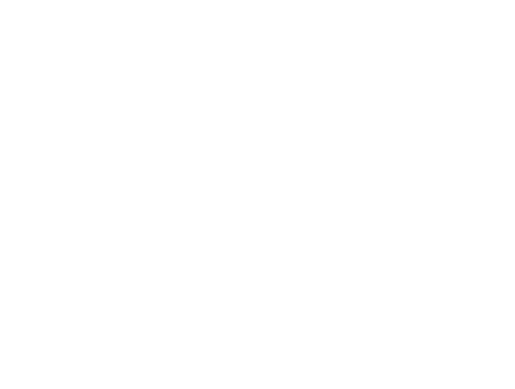

In [75]:
# Visualize the decision tree structure:
print(export_text(best_model, feature_names=list(X.columns)))
plot_tree(best_model, feature_names=X.columns, class_names=['age', 'trestbps	'], filled=True)
plt.show()


In [77]:
# Identify feature importance
importances = best_model.feature_importances_
importances

array([0.13448772, 0.2406715 , 0.01745184, 0.17300869, 0.06336214,
       0.06063181, 0.02993814, 0.02184514, 0.00782555, 0.00400392,
       0.02819749, 0.00726663, 0.02800597, 0.        , 0.05154117,
       0.02808712, 0.06388735, 0.03978784])

In [64]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
1,chol,0.240671
3,thalch,0.173009
0,trestbps,0.134488
16,thal_normal,0.063887
4,oldpeak,0.063362
5,num,0.060632
14,slope_flat,0.051541
17,thal_reversable defect,0.039788
6,sex_Male,0.029938
10,restecg_normal,0.028197


# Interview Questions:

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

##### Decision tree models have several hyperparameters that can significantly influence their performance. Understanding these hyperparameters and their effects is crucial for building and tuning a robust decision tree model. Here are some of the most common hyperparameters:


#### 1. MAX_DEPTH
#####  Definition: Maximum depth of the tree.
##### Effect:
#####    Controls the maximum number of levels in the tree.
#####    A smaller depth reduces overfitting but may lead to underfitting.
#####    A larger depth allows the model to capture more complexity but increases the risk of overfitting.
#### Best Practice:
#####    Use cross-validation to find an optimal value.


#### 2. MIN_SAMPLES_SPLIT
#### Definition:
#####   Minimum number of samples required to split an internal node.
#### Effect:
#####   Larger values make the tree more conservative, reducing overfitting by preventing splits for small subsets of data.
#####   Smaller values allow the tree to grow more complex, which might lead to overfitting.
#### Example:
#####   min_samples_split=2 means a node with at least two samples can be split.
#####   min_samples_split=10 requires a node to have at least ten samples to be split.


#### 3. MIN_SAMPLES_LEAF
#### Definition:
#####   Minimum number of samples required to be at a leaf node.
#### Effect:
#####   Larger values prevent the model from creating leaf nodes with very few samples, reducing overfitting.
#####   Smaller values allow the model to grow deeper with finer granularity, potentially overfitting.
#### Example:
#####   min_samples_leaf=1 allows single-sample leaves.
#####   min_samples_leaf=5 ensures each leaf has at least five samples.

#### 4. MAX_FEATURES
#### Definition: 
#####   The number of features to consider when looking for the best split.
#### Effect:
######  Using fewer features introduces randomness, which can help prevent overfitting and improve generalization.
######  Using all features ensures the model has access to all information at each split.
#### Example:
#####   max_features='sqrt': Use the square root of the total number of features.
#####   max_features=None: Use all features.

#### 5. CRITERION
#### Definition: 
#####   The function used to measure the quality of a split.
#### Common options:
#####   Gini Impurity ('gini'): Measures the likelihood of incorrect classification.
#####   Entropy ('entropy'): Measures information gain from splits.
#### Effect:
#####   Both work well, but entropy can be computationally more expensive.
#####   Gini tends to be slightly faster, while entropy may lead to better splits in some cases.

#### 6. MAX_LEAF_NODES
#### Definition:
#####   Maximum number of leaf nodes in the tree.
#### Effect:
#####   Limits the complexity of the tree by restricting the number of leaf nodes.
#####   Fewer leaf nodes simplify the model, reducing overfitting.


#### 7. MIN_IMPURITY_DECREASE
#### Definition:
#####   Minimum impurity decrease required for a split.
#### Effect:
#####   Prevents the tree from splitting nodes if the reduction in impurity (e.g., Gini or entropy) is below the threshold.
#####   Helps control overfitting by avoiding splits with negligible gain.


#### 8. SPLITTER
#### Definition:
#####    Strategy used to choose the split at each node.
#### Options:
#####    'best': Selects the best split based on the criterion.
######   'random': Selects a random split, adding more randomness to the model.
#### Effect:
#####   'best' is deterministic and tends to give better performance.
#####   'random' introduces randomness, which may improve generalization in some cases.


#### 9. CLASS_WEIGHT
#### Definition: 
#####   Weights associated with each class.
#### Effect:
#####   Useful for handling imbalanced datasets by penalizing misclassification of underrepresented classes more heavily.
#####   Helps the model focus on minority classes.


### 2. What is the difference between the Label encoding and One-hot encoding?

##### Label encoding and one-hot encoding are two methods used to convert categorical data into numerical formats suitable for machine learning models. Here's the difference between the two:

#### Label Encoding

#####  Definition:
##### Assigns a unique integer to each category in a feature.
#### How it works:
#####  Each category is replaced with a numeric value (e.g., 0, 1, 2, ...).
#### For example: 
#### ["Red", "Green", "Blue"] → [0, 1, 2]
#### When to use:
#####  Works well with ordinal data where the categories have a meaningful order (e.g., "Low", "Medium", "High").
#### Advantages:
#####  Simple and memory-efficient as it uses a single column.
#### Disadvantages:
#####  Can introduce unintended relationships or priority among categories (e.g., "Red" being 0 and "Green" being 1 might imply that "Green" is greater than "Red").

#### One-Hot Encoding

#### Definition:
#####  Converts each category into a binary vector, creating a separate column for each unique category.
#### How it works:
#####  For each category, it creates a column and assigns 1 to the corresponding category and 0 to others.
#### For example:
#####  ["Red", "Green", "Blue"] →
#####  Red   Green   Blue
#####  1      0      0
#####  0      1      0
#####  0      0      1
#### When to use:
#####  Works well with nominal data where categories do not have a meaningful order (e.g., "Dog", "Cat", "Bird").
#### Advantages:
#####  Avoids introducing ordinal relationships among categories
#### Disadvantages:
#####  Increases the dimensionality of the dataset, which can lead to the curse of dimensionality for features with many unique categories.

## THE END.....//